# CYO-Project
## Inventory Management

In [1]:
#Importing Required Libraries
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#Makes Python files useable
sys.path.append(os.path.abspath("../src"))

#Getting required functions from preprocess_data.py file
from preprocess_data import(
    load_data,
    iterative_outlier_removal,
    scale_features
)

#Loads dataset
file_path = '../data/Cleaned_ML_Dataset.csv'
df = pd.read_csv(file_path)

# Displays basic info
print("DataFrame Shape:", df.shape)
print("Column Types:\n", df.dtypes)


DataFrame Shape: (400, 16)
Column Types:
 RegionName              object
CountryName             object
State                   object
City                    object
WarehouseName           object
CategoryName            object
ProductName             object
ProductStandardCost    float64
Profit                 float64
ProductListPrice       float64
CustomerCreditLimit      int64
Status                  object
OrderDate               object
OrderItemQuantity        int64
PerUnitPrice           float64
TotalItemQuantity        int64
dtype: object


In [2]:
df.head()

,RegionName,CountryName,State,City,WarehouseName,CategoryName,ProductName,ProductStandardCost,Profit,ProductListPrice,CustomerCreditLimit,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,Southlake Texas,CPU,Intel Xeon E5-2699 V3 (OEM/Tray),2867.51,542.95,3410.46,5000,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,Southlake Texas,CPU,Intel Xeon E5-2697 V3,2326.27,448.71,2774.98,5000,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,Southlake Texas,CPU,Intel Xeon E5-2698 V3 (OEM/Tray),2035.18,625.54,2660.72,1200,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,Southlake Texas,CPU,Intel Xeon E5-2697 V4,2144.40,410.59,2554.99,2400,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,Southlake Texas,CPU,Intel Xeon E5-2685 V3 (OEM/Tray),2012.11,489.58,2501.69,1200,Shipped,09-Apr-17,106,109.99,125


In [3]:
df.describe()

,ProductStandardCost,Profit,ProductListPrice,CustomerCreditLimit,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1812.654525,189.743700,2002.398800,2033.617500,89.240000,839.253100,123.695000
std,4297.988742,254.318871,4432.591249,1534.488065,34.064253,706.449917,67.438876
min,12.630000,0.000000,15.550000,100.000000,32.000000,16.990000,0.000000
25%,414.160000,59.972500,502.982500,700.000000,61.000000,352.982500,92.750000
50%,698.320000,134.200000,849.990000,1500.000000,85.500000,686.990000,123.000000
75%,1671.950000,229.520000,1999.890000,3500.000000,118.000000,1055.990000,178.000000
max,75410.000000,2770.000000,78180.000000,5000.000000,157.000000,4139.000000,353.000000


In [4]:
#Selects all datatypes that are of type 'int64' or 'float64' and assigns them to numerical_columns variable
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

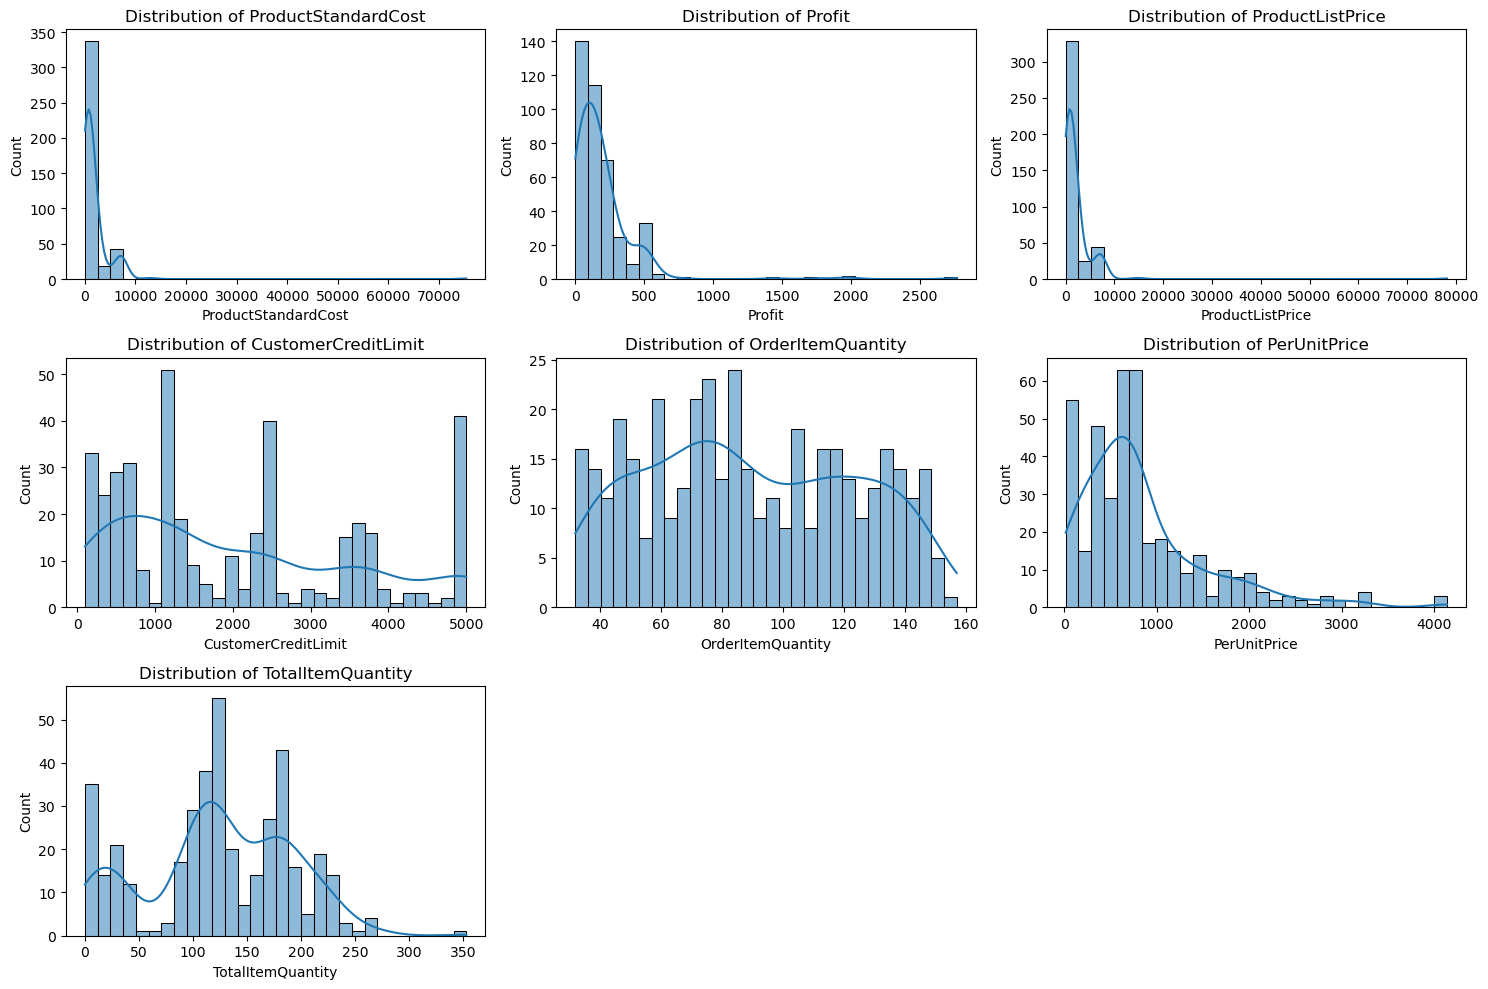

In [5]:
#Distribution Graph
plt.figure(figsize=(15,10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

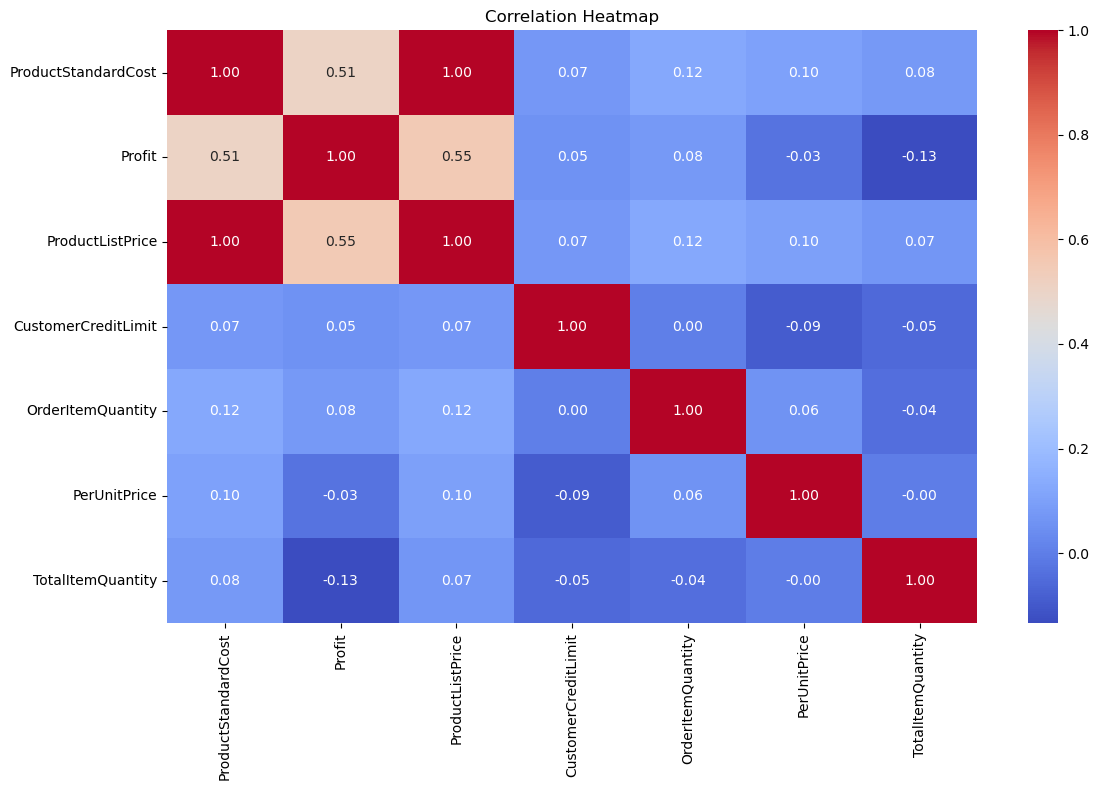

In [6]:
#This generates a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


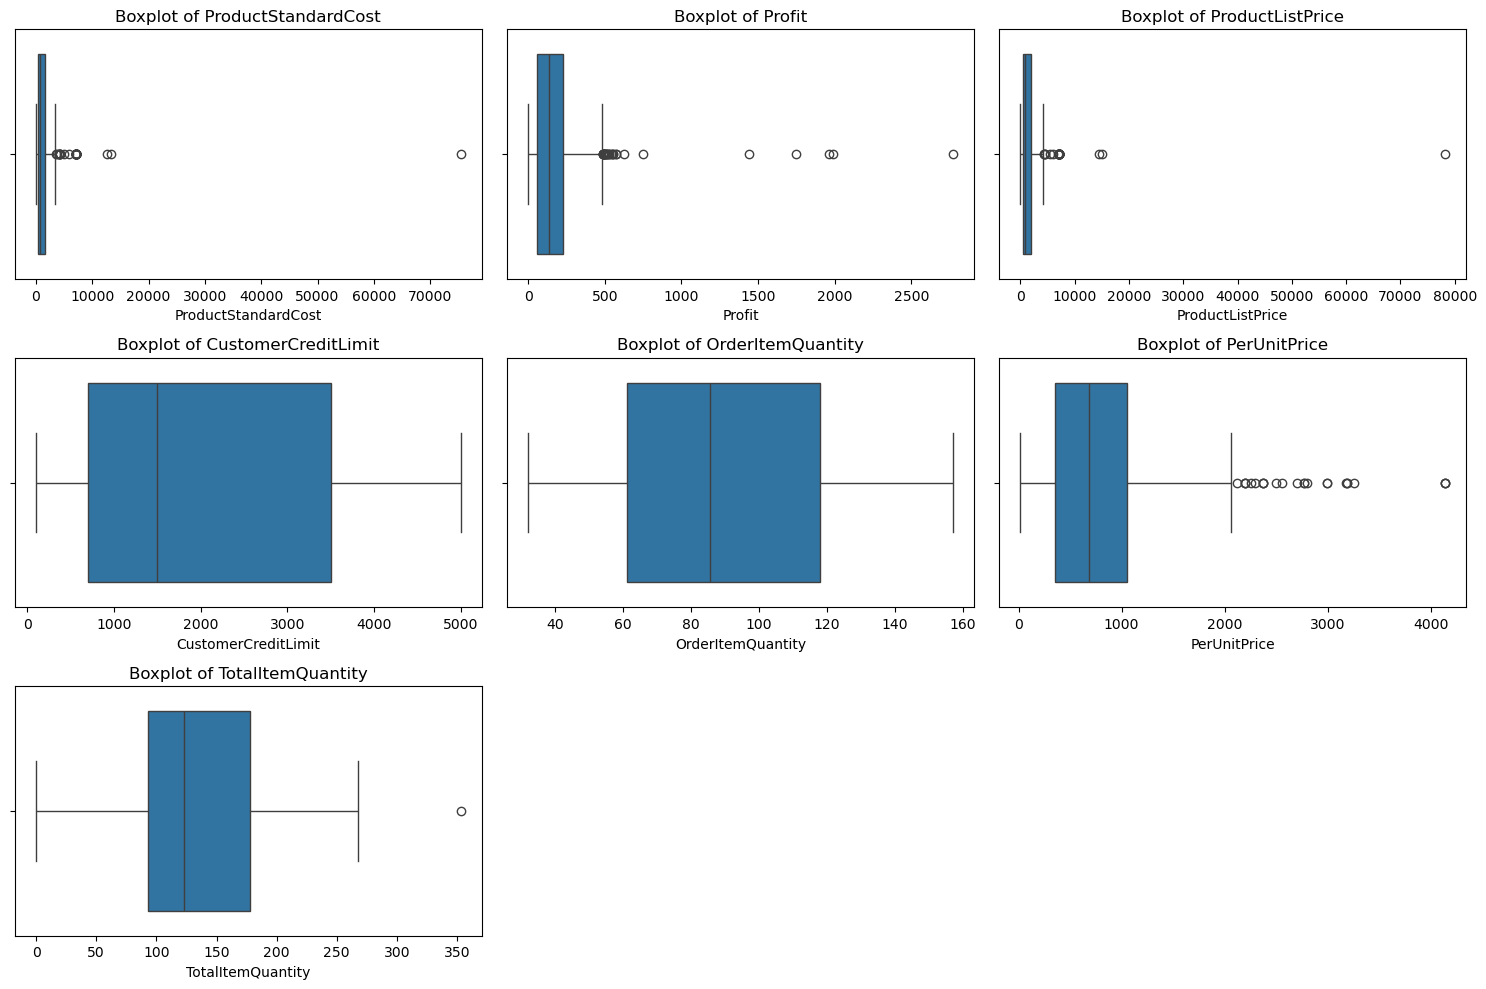

In [7]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], orient='h')  # Horizontal box plot
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [8]:
#Calls the load_data function from preprocess_data.py to load the new cleaned and encoded data with feature engineering
df = load_data(file_path)

#Selects all datatypes that are of type 'int64' or 'float64' and reassigns them to numerical_columns variable
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Calls the function iterative_outlier_removal from preprocess_data.py to remove outliers from the numerical columns
df = iterative_outlier_removal(df, numerical_columns)

#Calls the scale_featurs function from preprocess_data.py to scale the numerical features
df, _ = scale_features(df, numerical_columns)



c:\Users\chesa\Desktop\MLG382\Github ProjectStuff CYO P2\MLG382_CYO_PROJ_GroupX\src\preprocess_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


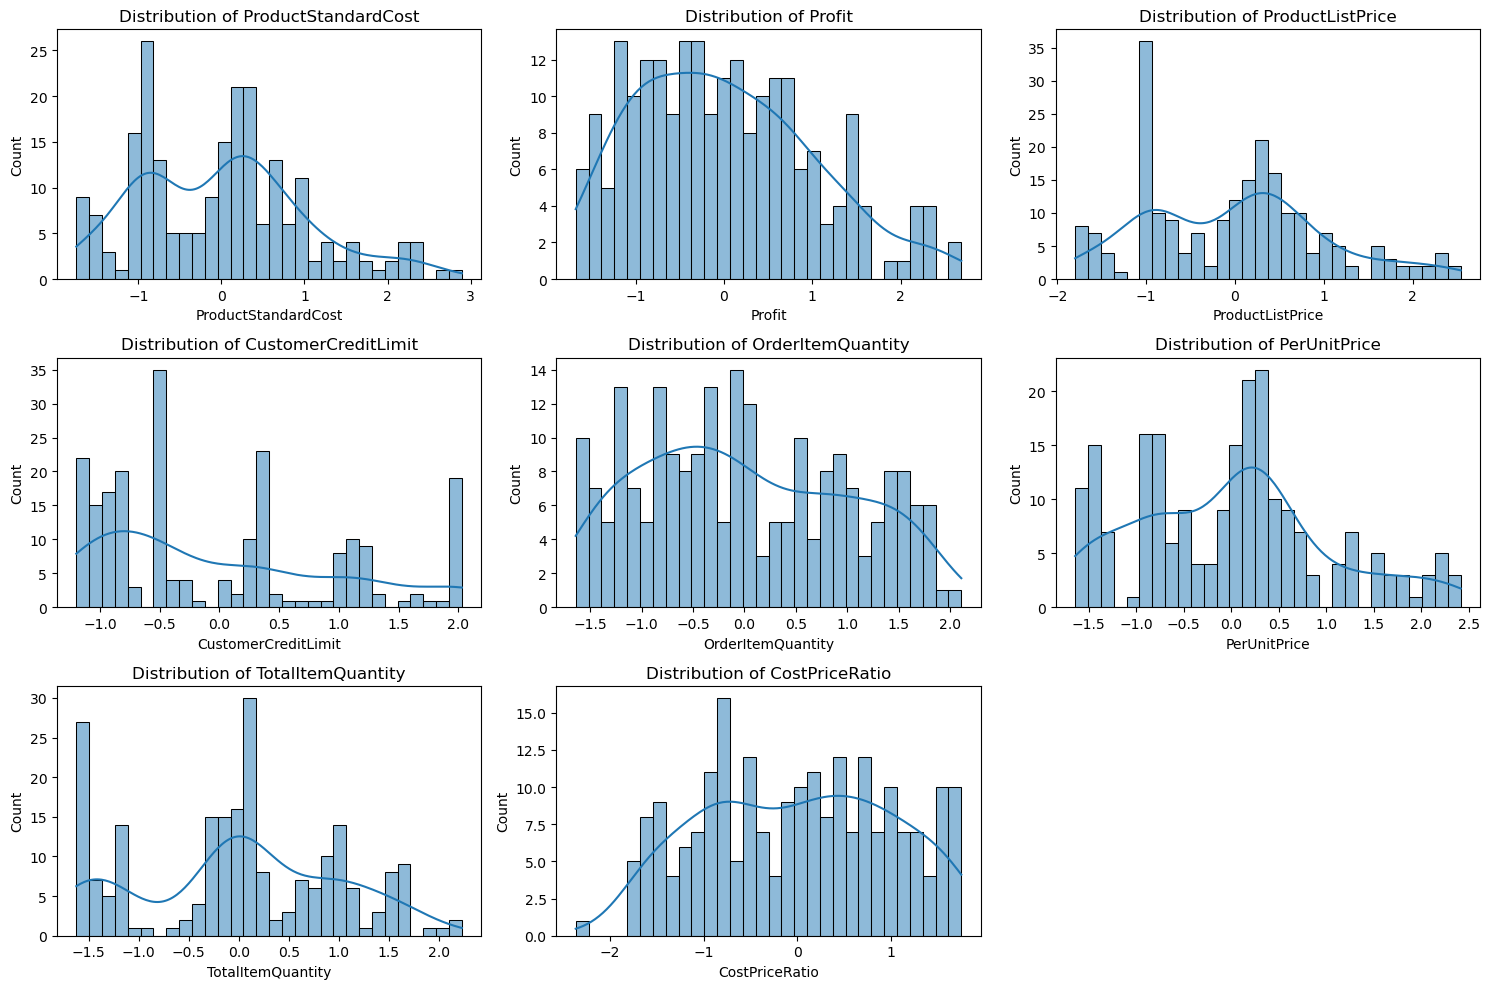

In [9]:
#Generates new Distribution graphs 
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

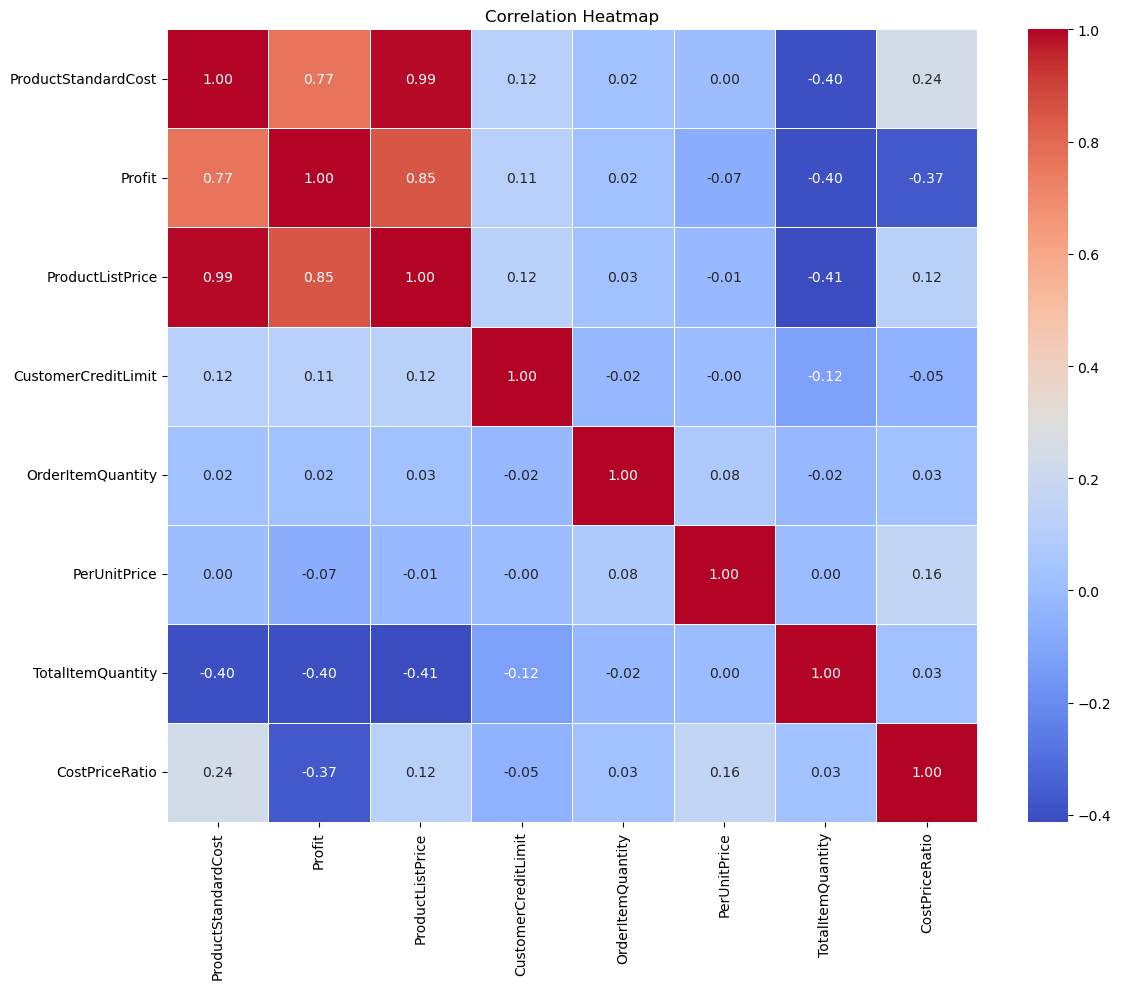

In [10]:
#Generates new correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

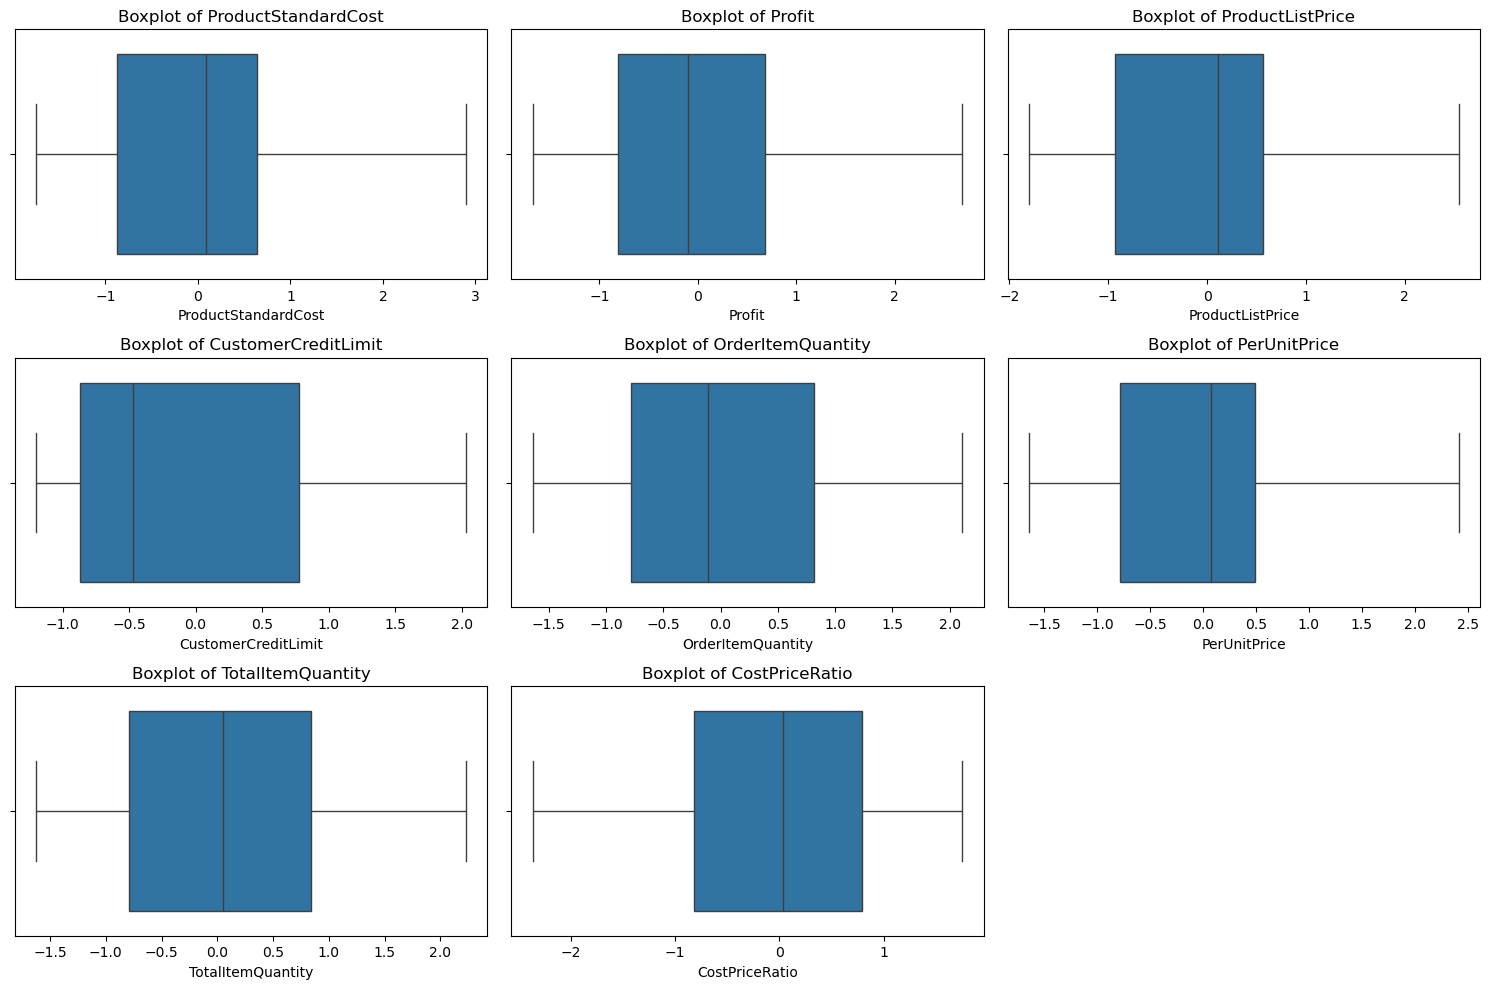

In [11]:
#Generates new box plots 
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], orient='h')  # Horizontal box plot
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [12]:
# Save the processed DataFrame to the artifacts directory
df.to_csv('../artifacts/processed_data.csv', index=False)
print("Processed data saved to ../artifacts/processed_data.csv")


Processed data saved to ../artifacts/processed_data.csv


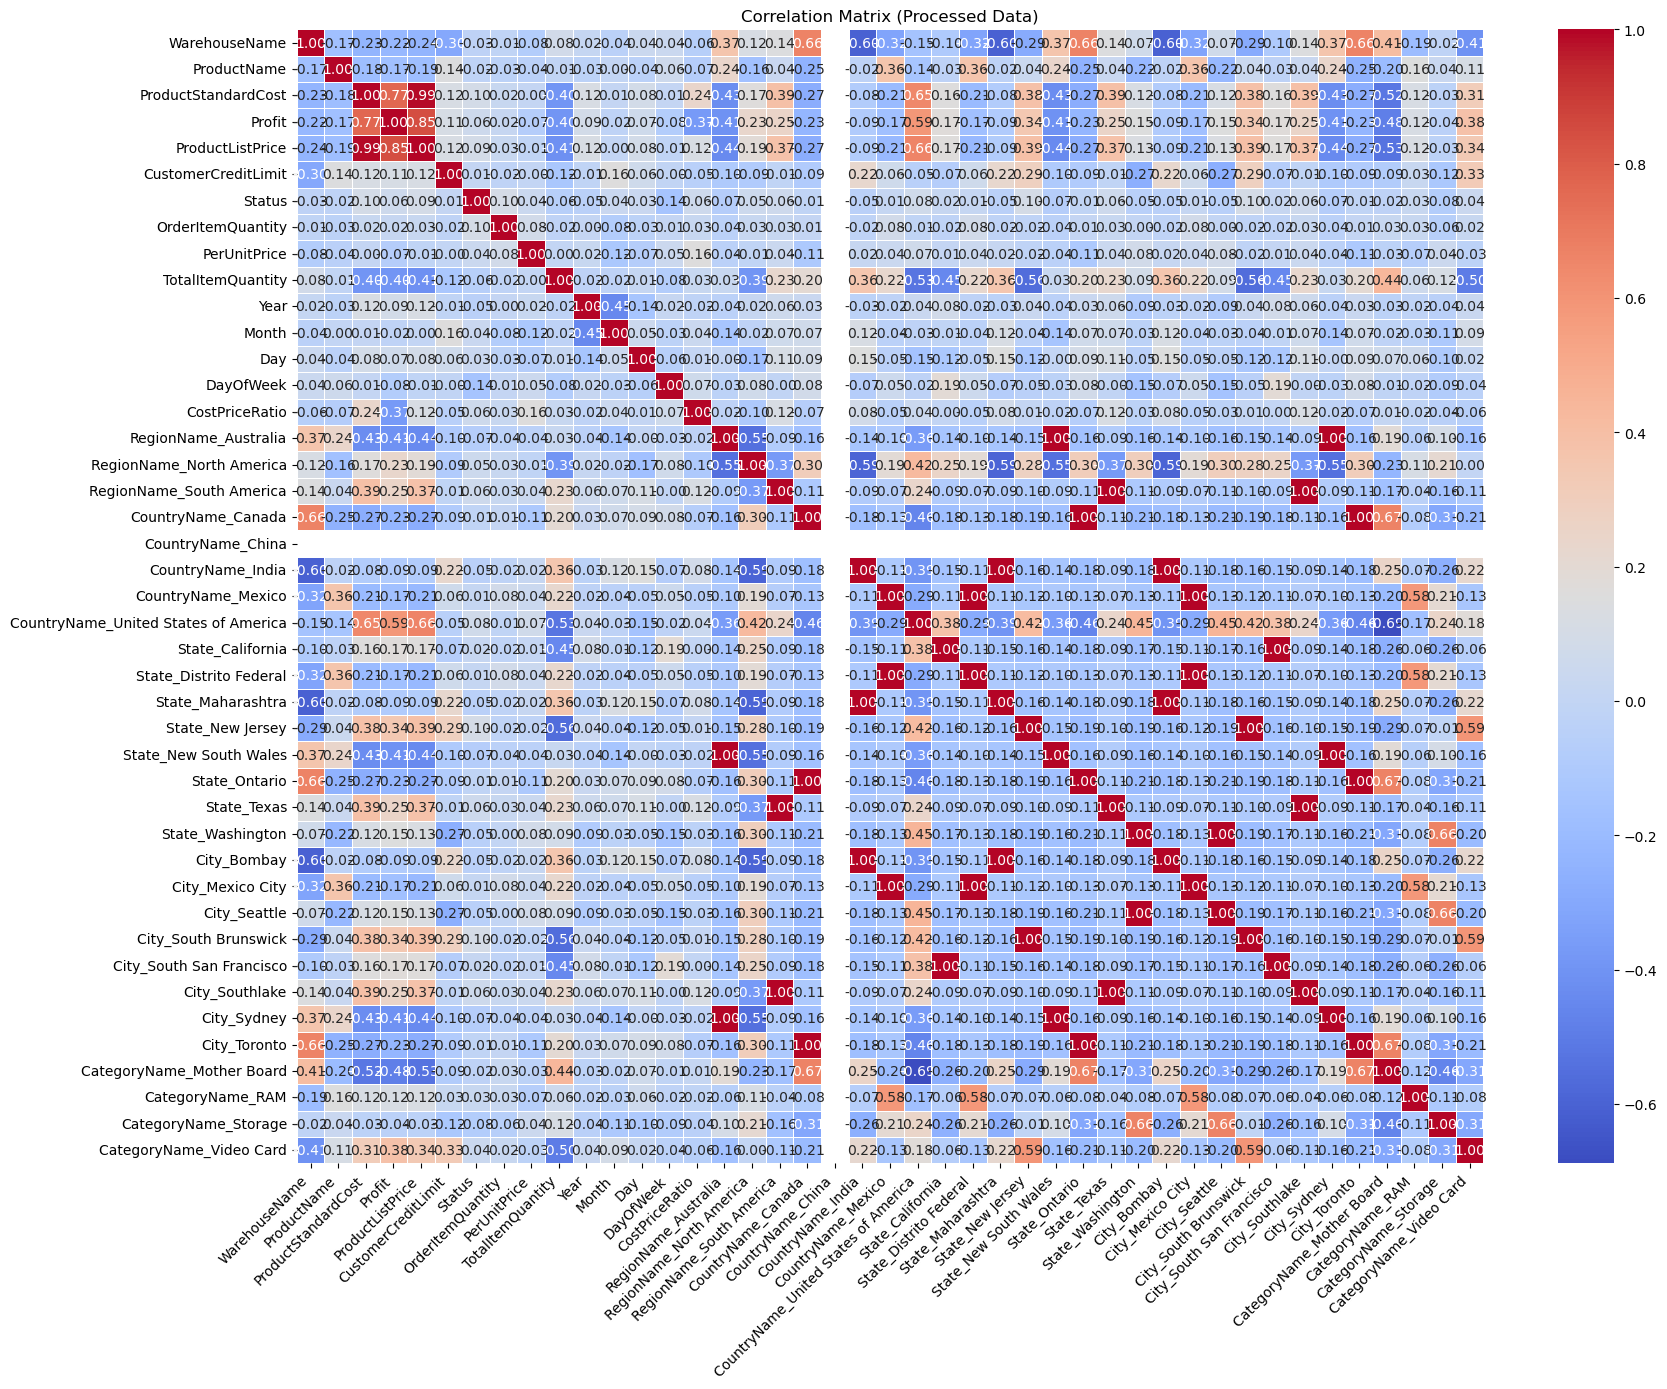

In [14]:
# Computes correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot with larger figure and rotated labels
plt.figure(figsize=(18, 14))  # Wider and taller
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Make axis labels readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix (Processed Data)")
plt.tight_layout()
plt.show()
